<a href="https://colab.research.google.com/github/pavank-23/21BDS0198_EDA/blob/main/Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Github Link:
https://github.com/pavank-23/21BDS0198_EDA

### Exploratory Data Analysis - Theory DA
##### Pavan K - 21BDS0198

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
!wget 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv'

--2024-11-07 14:52:20--  https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13495 (13K) [text/plain]
Saving to: ‘penguins_size.csv.1’

penguins_size.csv.1 100%[===================>]  13.18K  --.-KB/s    in 0.001s  

2024-11-07 14:52:20 (9.77 MB/s) - ‘penguins_size.csv.1’ saved [13495/13495]



In [3]:
penguins_df = pd.read_csv('/content/penguins_size.csv')
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex


Before we continue with the analysis, let's encode the categorical for easier replacements

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in ["species", "island", "sex"]:
    le = LabelEncoder()
    penguins_df[col] = le.fit_transform(penguins_df[col])

**Module 2 - Data Transformation**


Handling Missing Values

In [6]:
penguins_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


I. Removing missing data

Removing all the rows with atleast one instance of NaN

In [7]:
removed_df = penguins_df.dropna()
removed_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.1,18.7,181.0,3750.0,2
1,1,2,39.5,17.4,186.0,3800.0,1
2,1,2,40.3,18.0,195.0,3250.0,1
4,1,2,36.7,19.3,193.0,3450.0,1
5,1,2,39.3,20.6,190.0,3650.0,2


In [8]:
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


Removing rows with all values as NaN

In [9]:
removed_df = penguins_df.dropna(how = "all")
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


Removing all removes with a certain precent of NaN values

In [10]:
removed_df = penguins_df.dropna(thresh = 0.7)
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


II. Replacing Missing Data

For replacing missing data, we'll demonstrate the various techniques one can employ

Imputation - Mean

In [11]:
penguins_df['culmen_length_mm'] = penguins_df['culmen_length_mm'].fillna(penguins_df['culmen_length_mm'].mean())

Imputation - Median

In [12]:
penguins_df['culmen_depth_mm'] = penguins_df['culmen_depth_mm'].fillna(penguins_df['culmen_depth_mm'].mean())

Imputation - Mode

In [13]:
penguins_df['island'] = penguins_df['island'].fillna(penguins_df['island'].mode())

Multiple Imputation

In [14]:
!pip install miceforest

Converting given data to numeric or categorical before applying multiple imputation as ImputationKernel does not take in 'object' dtype from pandas

In [15]:
penguins_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
for col in penguins_df.select_dtypes(include=['object']).columns:
    try:
        penguins_df[col] = pd.to_numeric(penguins_df[col])
    except ValueError:
        penguins_df[col] = penguins_df[col].astype('category')

In [17]:
for col in penguins_df.columns:
  if col not in ['species' , 'sex', 'island']:
    print(min(penguins_df[col]))
    print(min(penguins_df[col]))

32.1
32.1
13.1
13.1
172.0
172.0
2700.0
2700.0


In [18]:
penguins_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,3
body_mass_g,2
sex,0


In [19]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.10000,18.70000,181.0,3750.0,2
1,1,2,39.50000,17.40000,186.0,3800.0,1
2,1,2,40.30000,18.00000,195.0,3250.0,1
3,1,2,43.92193,17.15117,NaN,NaN,3
4,1,2,36.70000,19.30000,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,3,0,43.92193,17.15117,NaN,NaN,3
340,3,0,46.80000,14.30000,215.0,4850.0,1
341,3,0,50.40000,15.70000,222.0,5750.0,2
342,3,0,45.20000,14.80000,212.0,5200.0,1


In [20]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
  data = penguins_df,
  random_state = 42
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [21]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.10000,18.70000,181.0,3750.0,2
1,1,2,39.50000,17.40000,186.0,3800.0,1
2,1,2,40.30000,18.00000,195.0,3250.0,1
3,1,2,43.92193,17.15117,191.0,3550.0,3
4,1,2,36.70000,19.30000,193.0,3450.0,1



**Module 3 - Correlation Analysis and Time Series Analysis** and **Module 4 - Data Summarization and Visualization**

Univariate Analysis

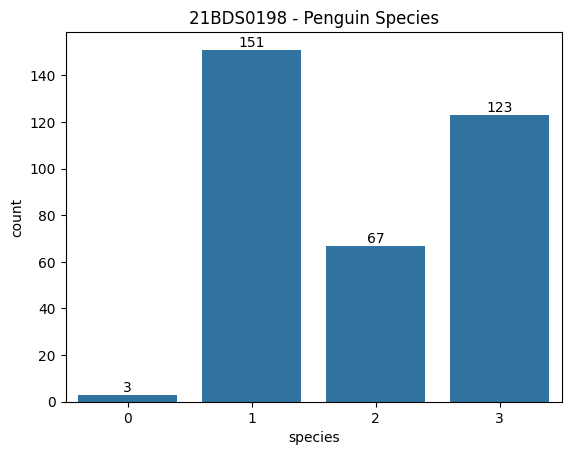

In [22]:
ax = sns.countplot(data = penguins_df, x = "species")
ax.bar_label(ax.containers[0])
ax.set(title = "21BDS0198 - Penguin Species")
plt.show()

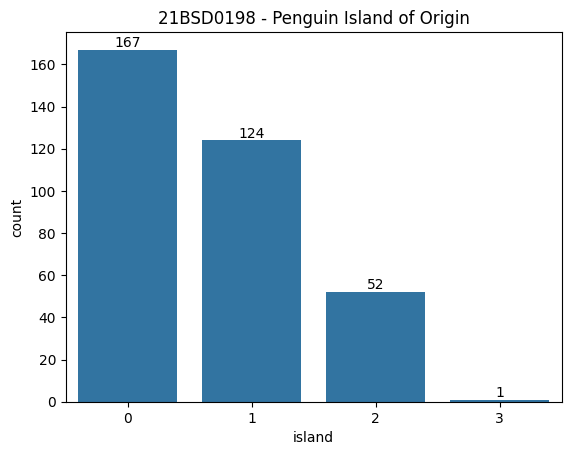

In [23]:
ax = sns.countplot(data = penguins_df, x="island")
ax.bar_label(ax.containers[0])
ax.set(title = "21BSD0198 - Penguin Island of Origin")
plt.show()

Bivariate Analysis

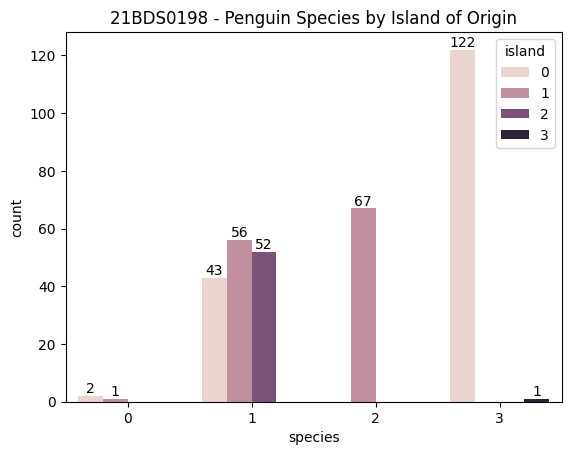

In [24]:
ax = sns.countplot(data = penguins_df, x = "species", hue = "island")
ax.set(title="21BDS0198 - Penguin Species by Island of Origin")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

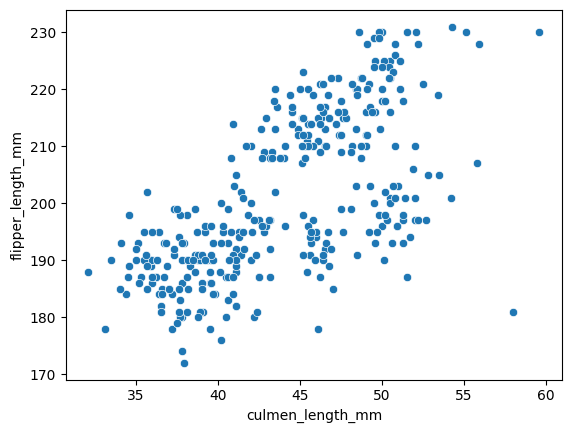

In [25]:
sns.scatterplot(x = "culmen_length_mm", y = "flipper_length_mm", data = penguins_df)

<Axes: xlabel='species', ylabel='body_mass_g'>

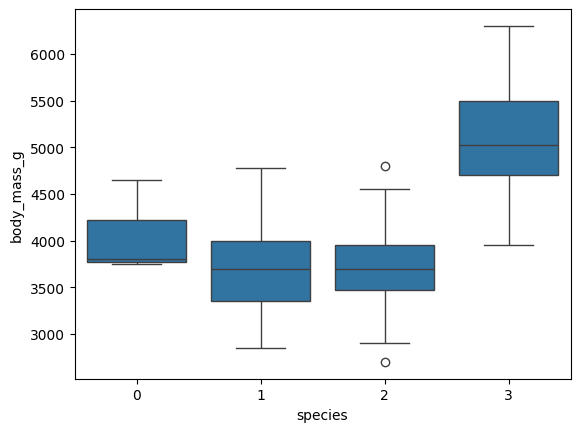

In [26]:
sns.boxplot(x = "species", y = "body_mass_g", data = penguins_df)

Multivariate Analysis

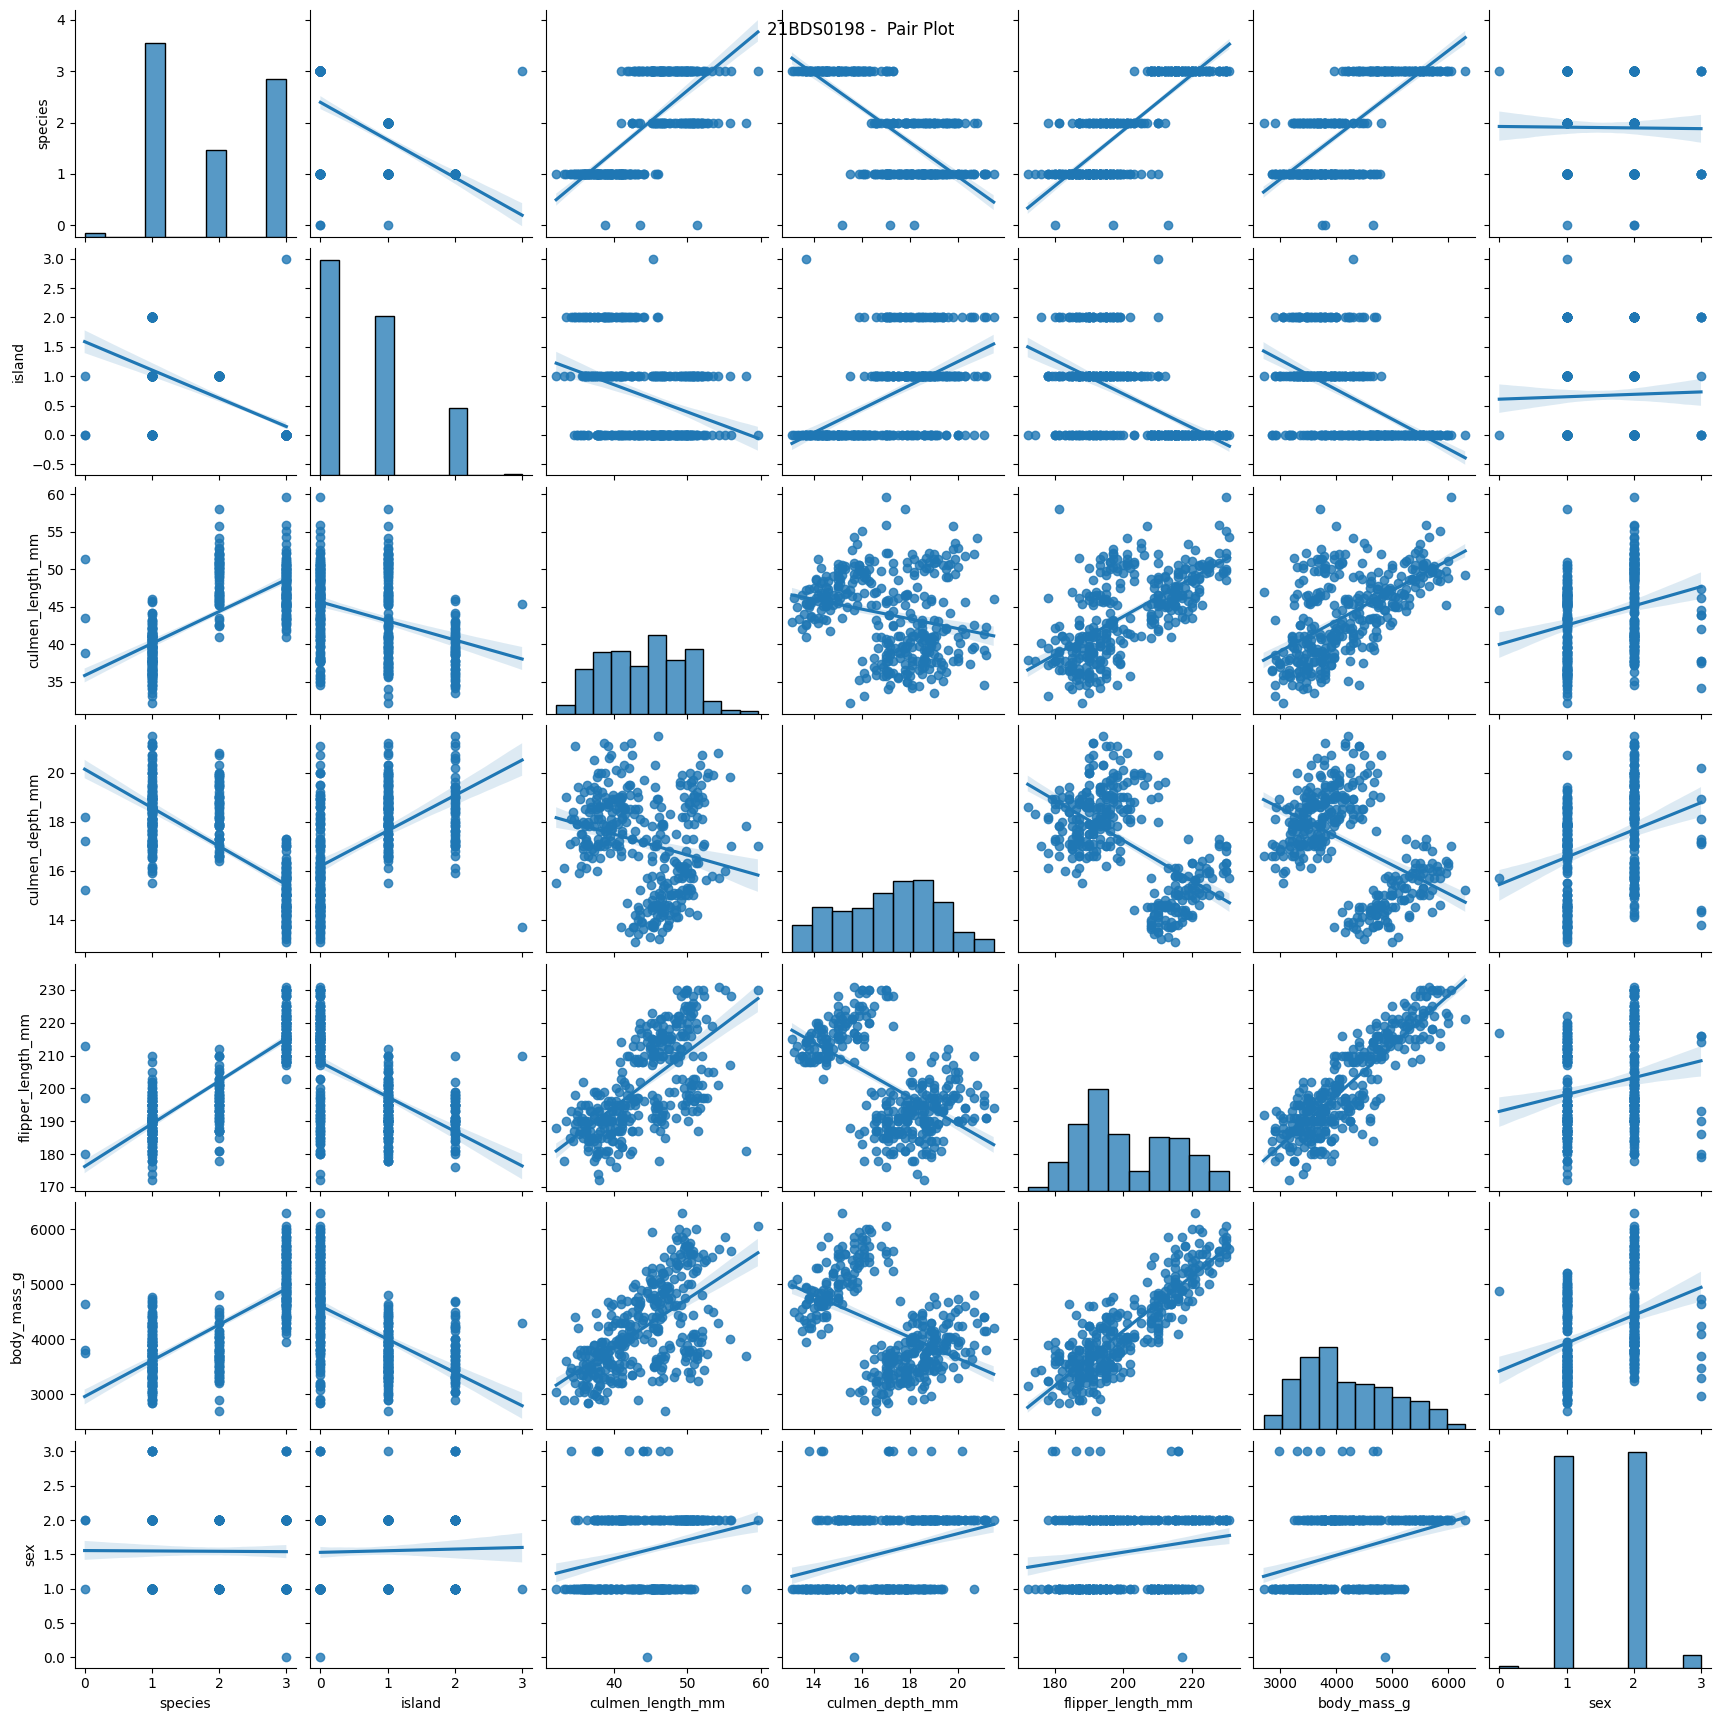

In [27]:
ax = sns.pairplot(penguins_df, kind = "reg")
ax.fig.suptitle("21BDS0198 -  Pair Plot")
plt.show()

Correlation (2D Statistical Analysis)

In [28]:
correlation = penguins_df.corr(method = 'pearson', numeric_only = True)
correlation

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.594078,0.712148,-0.723498,0.838383,0.738318,-0.008712
island,-0.594078,1.000000,-0.343697,0.539001,-0.549106,-0.552337,0.031342
culmen_length_mm,0.712148,-0.343697,1.000000,-0.235053,0.655728,0.595110,0.264024
culmen_depth_mm,-0.723498,0.539001,-0.235053,1.000000,-0.582847,-0.471916,0.316379
flipper_length_mm,0.838383,-0.549106,0.655728,-0.582847,1.000000,0.870837,0.200883
body_mass_g,0.738318,-0.552337,0.595110,-0.471916,0.870837,1.000000,0.347376
sex,-0.008712,0.031342,0.264024,0.316379,0.200883,0.347376,1.000000


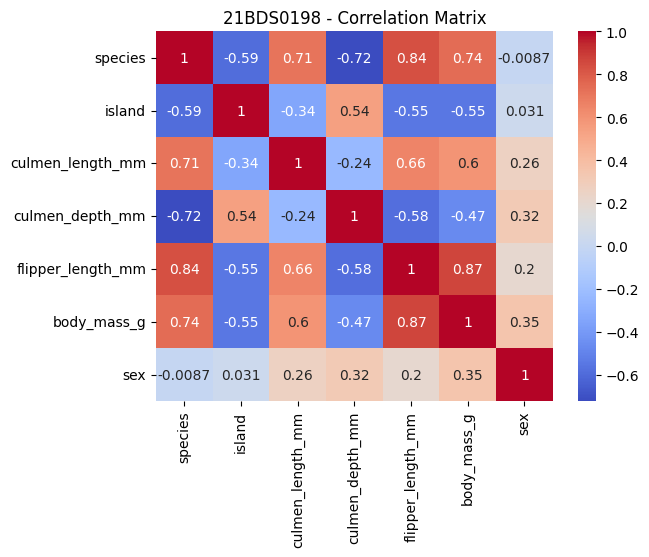

In [29]:
corr_matrix = penguins_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('21BDS0198 - Correlation Matrix')
plt.show()

Summarized Data

In [30]:
penguins_df.describe(include = 'all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,341.000000,342.000000,344.000000
mean,1.901163,0.671512,43.921930,17.151170,200.873900,4201.754386,1.543605
std,0.907757,0.736157,5.443643,1.969027,14.061585,801.954536,0.559430
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,1.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,1.000000
50%,2.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,2.000000
75%,3.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,2.000000
max,3.000000,3.000000,59.600000,21.500000,231.000000,6300.000000,3.000000


**Module 5 - Clustering Algorithms**

In [31]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [32]:
features = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [33]:
penguins_df = penguins_df.dropna()
penguins_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [34]:
# KMeans Clustering
kmeans = KMeans(n_clusters = 3, random_state = 42)
penguins_df['kmeans_cluster'] = kmeans.fit_predict(penguins_df)

<ipython-input-34-ff9ab0c536e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_df['kmeans_cluster'] = kmeans.fit_predict(penguins_df)


In [35]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
penguins_df['spectral_cluster'] = spectral.fit_predict(penguins_df)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
<ipython-input-35-85116b7c0098>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_df['spectral_cluster'] = spectral.fit_predict(penguins_df)


In [36]:
agglo = AgglomerativeClustering(n_clusters=3)
penguins_df['agglo_cluster'] = agglo.fit_predict(penguins_df)

<ipython-input-36-d84f2c5f5ab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_df['agglo_cluster'] = agglo.fit_predict(penguins_df)


In [37]:
print("Silhouette Score for KMeans:", silhouette_score(penguins_df, penguins_df['kmeans_cluster']))
print("Silhouette Score for Spectral Clustering:", silhouette_score(penguins_df, penguins_df['spectral_cluster']))
print("Silhouette Score for Agglomerative Clustering:", silhouette_score(penguins_df, penguins_df['agglo_cluster']))

Silhouette Score for KMeans: 0.5588404277533341
Silhouette Score for Spectral Clustering: 0.4163660029237438
Silhouette Score for Agglomerative Clustering: 0.5851305182586997


**Module 6 - Dimensionality Reduction**

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(penguins_df)
penguins_df['PCA1'] = pca_result[:, 0]
penguins_df['PCA2'] = pca_result[:, 1]

<ipython-input-39-1145ca6af5a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_df['PCA1'] = pca_result[:, 0]
<ipython-input-39-1145ca6af5a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_df['PCA2'] = pca_result[:, 1]


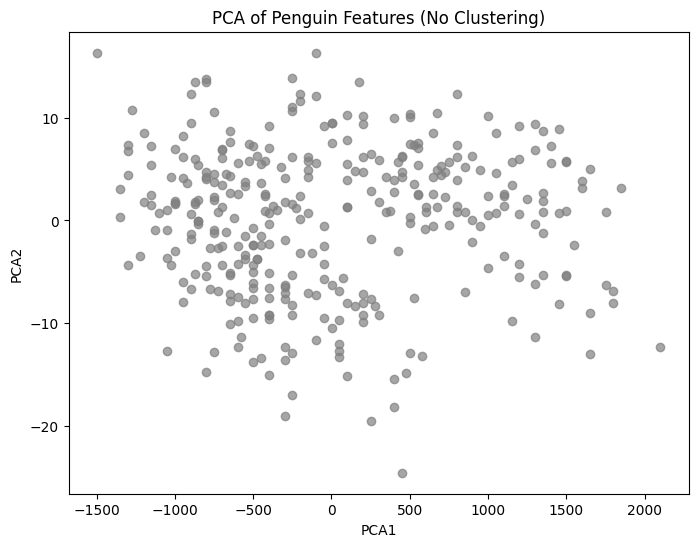

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df['PCA1'], penguins_df['PCA2'], c = 'gray', alpha = 0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Penguin Features (No Clustering)')
plt.show()

Text(0.5, 1.0, 'KMeans Clustering (PCA)')

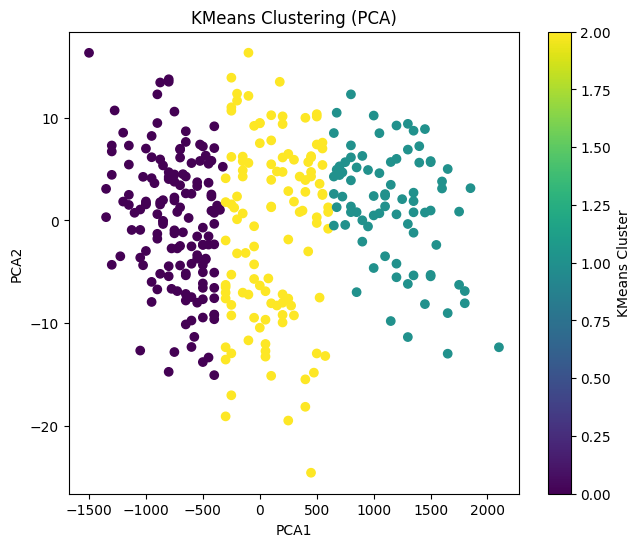

In [41]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(penguins_df['PCA1'], penguins_df['PCA2'], c = penguins_df['kmeans_cluster'], cmap = 'viridis')
plt.colorbar(label = 'KMeans Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('21BDS0198 - KMeans Clustering (PCA)')

Text(0.5, 1.0, 'Spectral Clustering (PCA)')

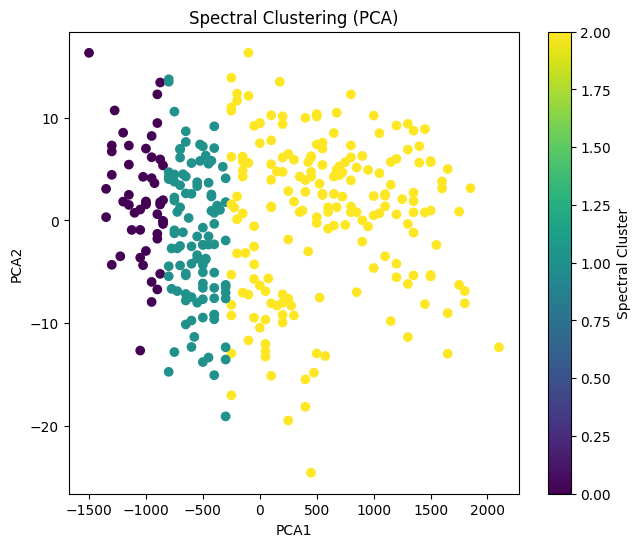

In [42]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(penguins_df['PCA1'], penguins_df['PCA2'], c = penguins_df['spectral_cluster'], cmap = 'viridis')
plt.colorbar(label = 'Spectral Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('21BDS0198 - Spectral Clustering (PCA)')

Text(0.5, 1.0, 'Agglomerative Clustering (PCA)')

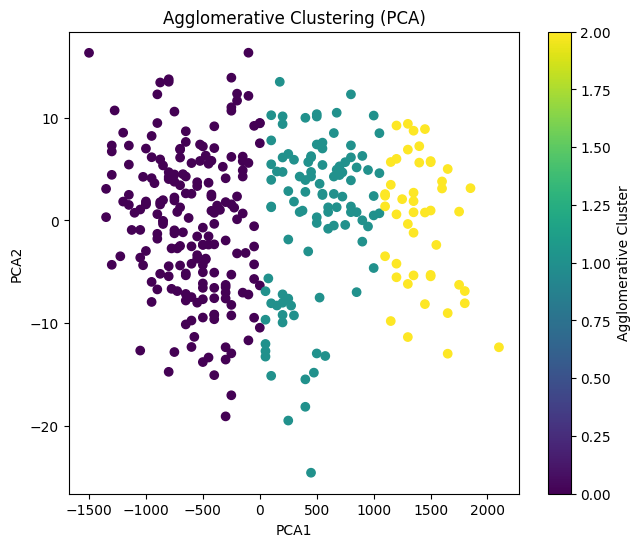

In [43]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(penguins_df['PCA1'], penguins_df['PCA2'], c = penguins_df['agglo_cluster'], cmap = 'viridis')
plt.colorbar(label='Agglomerative Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('21BDS0198 - Agglomerative Clustering (PCA)')

**Module 7 - Model Development and Evaluation**

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
X = penguins_df.drop("body_mass_g", axis = 1)
y = penguins_df['body_mass_g']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6.353706154392821e-25
R-squared: 1.0


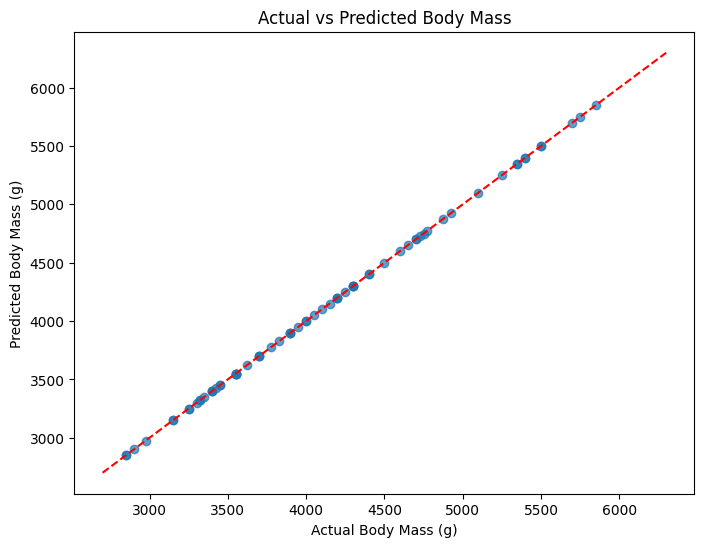

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.title('21BDS0198 - Actual vs Predicted Body Mass')
plt.show()